# SOMMAIRE:
* [Importations](#import)
* [Observation de notre dataset](#obs)
* [Modification du dataset](#modif)
* [Gestion des null](#null)
* [Dataset final](#final)

## Importations <a class="anchor" id="import"></a>

In [2]:
# Import librairie Pandas

import pandas as pd

In [3]:
# Import librairie Seaborn

import seaborn as sns

In [4]:
# Import librairie Matplotlib

import matplotlib.pyplot as plt

In [5]:
# Import dataset immobilier : train_data

df_immobilier  = pd.read_csv("train_data.csv")
df_immobilier.head(10)

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
5,8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
6,5438,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN
7,14856,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN
8,19956,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND
9,17175,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,334600.0,NEAR OCEAN


## Observation de notre dataset <a class="anchor" id="obs"></a>

In [6]:
# Je veux voir les dimensions de mon dataset

df_immobilier.shape

(16512, 11)

In [7]:
# J'observe les features du dataset et leurs types
# On devrait changer en int le type des colonnes :
# median_age, housing_median_age, total_rooms, total_bedrooms

df_immobilier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [8]:
# Informations sur les quartiles, la moyenne, ecarts type, les valeurs minimale et maximum

df_immobilier.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# On observe si des Nan values son presentes dans notre dataset
# Ici, 176 Nan values pour la colonne "total_bedrooms"

nan_value = df_immobilier.isnull().sum()
nan_value

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# Je veux connaitre les valeurs pour la colonne "ocean_proximity " et leurs nombres
# On peut voir ici 5 type de proximity par rapport à l'ocean dans un type exceptionnel (ISLAND) avec seulement 4 valeurs correspondantes

type_proximity = df_immobilier["ocean_proximity"].value_counts()
type_proximity

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
# Graphique pour avoir une vue d'ensemble de notre dataset
# On observe 3 droites pour la feature total rooms en lien avec households, population,total_bedrooms.
# On observe 2 droites pour la total bedrooms en lien avec population et households
# On observe 1 droite pour population avec household

graph1 = sns.PairGrid(data = df_immobilier,corner = True)
graph1.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
graph1.map_lower(sns.scatterplot, marker = "+")
graph1.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
graph1.add_legend(frameon=True)
graph1.legend.set_bbox_to_anchor((.61,.6))

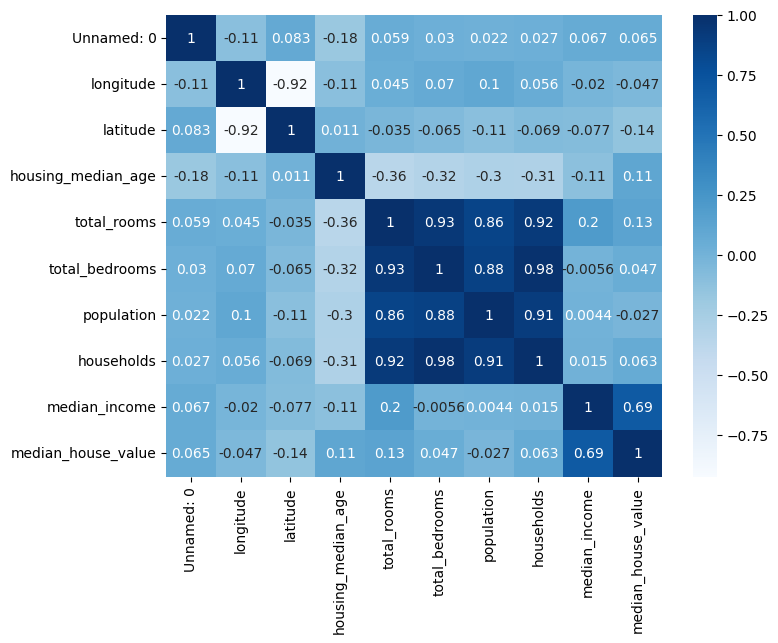

In [12]:
# Graphique de correlation pour notre dataset
# Comme sur le graphique precedent, on observe une forte correlation positive au centre liés au même features
# De plus les features median_income et median_house_value sont egalement correlées positivement

corr_df = df_immobilier.corr(method='pearson')
#plt.matshow(corr_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap=plt.cm.Blues)
plt.show()

## Modification du dataset <a class="anchor" id="modif"></a>

In [ ]:
# rename, drop, new_column

In [ ]:
# Regroupement par rapport a l'ancienetée d'une maison et sa valeur median

house_age_price = df_immobilier.groupby(['housing_median_age', 'median_house_value'])
house_age_price.first

## Gestion des null <a class="anchor" id="null"></a>

## Dataset final <a class="anchor" id="final"></a>